In [5626]:
from scipy import stats
from scipy.stats import skew,norm  # for some statistics
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
import scipy.stats as stats


#Visualizing tools
import seaborn as sns
import matplotlib.pyplot as plt

#preprocessing tools
import pandas as pd
import numpy as np

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

#ML Algoirthm
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
import sklearn.linear_model as linear_model
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor

In [5627]:
import warnings
warnings.filterwarnings("ignore")

In [5628]:
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
import sklearn.linear_model as linear_model
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor

In [5629]:
import lightgbm as lgb
import warnings

from scipy.stats import sem
from numpy import mean
from numpy import std
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

from catboost import CatBoostRegressor

In [5630]:
ttrain = pd.read_csv('Train.csv')
ttest = pd.read_csv('Test.csv')

In [5631]:
ttest_na = (ttest.isnull().sum() / len(ttest)) * 100
ttest_na = ttest_na.drop(ttest_na[ttest_na == 0].index).sort_values(ascending=False)[:25]
missing_data = pd.DataFrame({'Missing Ratio' :ttest_na})
missing_data.head(20)

,Missing Ratio
medium,76.679524
youtube,62.439730
social_score_24h_rank,34.683382
social_volume_24h_rank,34.683382
volume_24h_rank,34.683382
percent_change_24h_rank,34.683382
percent_change_24h,33.285117
market_cap_rank,33.011893
market_cap_global,32.819029
market_cap,32.642237


In [5632]:
ttrain_na = (ttrain.isnull().sum() / len(ttrain)) * 100
ttrain_na = ttrain_na.drop(ttrain_na[ttrain_na == 0].index).sort_values(ascending=False)[:25]
missing_data = pd.DataFrame({'Missing Ratio' :ttrain_na})
missing_data.head(20)

,Missing Ratio
medium,76.646612
youtube,62.112096
percent_change_24h_rank,35.821723
social_volume_24h_rank,35.821723
social_score_24h_rank,35.821723
volume_24h_rank,35.821723
percent_change_24h,34.190944
market_cap_rank,34.183027
market_cap_global,33.890120
market_cap,33.668461


In [5633]:
fin_data = pd.concat([ttrain,ttest]).reset_index(drop=True)
fin_data.drop(["id","asset_id"], axis=1, inplace = True)

fin_data.fillna(0, inplace=True)

In [5634]:
#import numpy as np
#from sklearn.experimental import enable_iterative_imputer 
#from sklearn.impute import IterativeImputer

# Impute missing values using iterative imputer
#iter_imp = IterativeImputer(initial_strategy = 'most_frequent',imputation_order = 'random',random_state= 42)

#for i in ttrain.drop(['id'], axis=1).columns:
    #ttrain[i] = pd.DataFrame(iter_imp.fit_transform(ttrain[i].values.reshape(-1,1)))

In [5635]:
#for i in ttest.drop(['id'], axis=1).columns:
    #ttest[i] = pd.DataFrame(iter_imp.fit_transform(ttest[i].values.reshape(-1,1)))

In [5636]:
#fin_data = pd.concat([ttrain,ttest]).reset_index(drop=True)
#fin_data.drop(["id","asset_id"], axis=1, inplace = True)

In [5637]:
fin_data.duplicated(keep='last').sum()

101

In [5638]:
#fin_data.drop_duplicates(inplace = True)

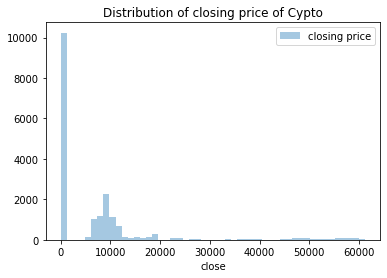

In [5639]:
sns.distplot(fin_data['close'], kde=False, label='closing price') #default bins using Freedman-Diaconis rule.
#sns.distplot(joined_data['Open'], kde=False, label='Open price') #default bins using Freedman-Diaconis rule.
#sns.distplot(joined_data['High'], kde=False, label='High price') #default bins using Freedman-Diaconis rule.
plt.title("Distribution of closing price of Cypto")
plt.legend(loc='best')
plt.show()

In [5640]:
fin_data.columns

Index(['open', 'high', 'low', 'volume', 'market_cap', 'url_shares',
       'unique_url_shares', 'reddit_posts', 'reddit_posts_score',
       'reddit_comments', 'reddit_comments_score', 'tweets', 'tweet_spam',
       'tweet_followers', 'tweet_quotes', 'tweet_retweets', 'tweet_replies',
       'tweet_favorites', 'tweet_sentiment1', 'tweet_sentiment2',
       'tweet_sentiment3', 'tweet_sentiment4', 'tweet_sentiment5',
       'tweet_sentiment_impact1', 'tweet_sentiment_impact2',
       'tweet_sentiment_impact3', 'tweet_sentiment_impact4',
       'tweet_sentiment_impact5', 'social_score', 'average_sentiment', 'news',
       'price_score', 'social_impact_score', 'correlation_rank',
       'galaxy_score', 'volatility', 'market_cap_rank',
       'percent_change_24h_rank', 'volume_24h_rank', 'social_volume_24h_rank',
       'social_score_24h_rank', 'medium', 'youtube', 'social_volume',
       'percent_change_24h', 'market_cap_global', 'close'],
      dtype='object')

In [5641]:
#fin_data['bet'] = fin_data['open']-fin_data['low']
fin_data['new'] = fin_data['high']*fin_data['volume']*fin_data['market_cap_rank']
fin_data['new2'] = fin_data['high']*fin_data['social_volume_24h_rank']*fin_data['reddit_posts']
fin_data['social'] = fin_data['tweets']*fin_data['tweet_retweets']*fin_data['tweet_spam']*fin_data['unique_url_shares']*fin_data['social_impact_score']

In [5642]:
#fin_data.drop(['tweet_sentiment1','tweet_sentiment2','tweet_sentiment3','tweet_sentiment5'], axis=1, inplace = True)

In [5643]:
fin_data.corr()

,open,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,reddit_posts_score,reddit_comments,...,social_score_24h_rank,medium,youtube,social_volume,percent_change_24h,market_cap_global,close,new,new2,social
open,1.000000,0.999975,0.999969,0.454620,0.973429,0.710542,0.684770,0.728920,0.143980,0.210950,...,0.508052,0.238211,0.063512,0.715799,0.107087,0.972710,0.755323,0.839462,0.876407,0.096407
high,0.999975,1.000000,0.999950,0.455172,0.973502,0.710266,0.684378,0.729289,0.144783,0.212203,...,0.507170,0.238205,0.063168,0.716288,0.107402,0.972746,0.755440,0.840637,0.877235,0.096985
low,0.999969,0.999950,1.000000,0.453788,0.973384,0.710908,0.685220,0.728537,0.143455,0.209618,...,0.508961,0.238564,0.063867,0.715545,0.108240,0.972710,0.755442,0.837847,0.875645,0.096177
volume,0.454620,0.455172,0.453788,1.000000,0.438037,0.429141,0.411138,0.434203,0.097773,0.051323,...,0.381351,0.201657,0.077654,0.416585,0.057467,0.433538,0.338750,0.676729,0.406839,0.073076
market_cap,0.973429,0.973502,0.973384,0.438037,1.000000,0.691811,0.663989,0.701168,0.142449,0.208807,...,0.488457,0.234664,0.052007,0.692808,0.093862,0.998323,0.734839,0.826958,0.862118,0.097172
url_shares,0.710542,0.710266,0.710908,0.429141,0.691811,1.000000,0.950770,0.768676,0.128936,-0.047609,...,0.730765,0.361002,0.213254,0.765955,0.129464,0.681743,0.529659,0.536917,0.624010,0.205338
unique_url_shares,0.684770,0.684378,0.685220,0.411138,0.663989,0.950770,1.000000,0.725020,0.099344,-0.097647,...,0.765880,0.345057,0.205343,0.716922,0.122537,0.650289,0.511235,0.488384,0.569056,0.129572
reddit_posts,0.728920,0.729289,0.728537,0.434203,0.701168,0.768676,0.725020,1.000000,0.206219,0.196927,...,0.530102,0.362193,0.170353,0.746032,0.135303,0.694417,0.553107,0.623921,0.818110,0.160479
reddit_posts_score,0.143980,0.144783,0.143455,0.097773,0.142449,0.128936,0.099344,0.206219,1.000000,0.251685,...,0.023316,0.026025,-0.011374,0.184951,0.028536,0.139968,0.109405,0.180812,0.231147,0.182954
reddit_comments,0.210950,0.212203,0.209618,0.051323,0.208807,-0.047609,-0.097647,0.196927,0.251685,1.000000,...,-0.311934,-0.056696,-0.107047,0.151717,0.022437,0.215531,0.155279,0.314710,0.364359,0.093845


In [5644]:
# Find most important features relative to target
print("Find most important features relative to target")
corr = fin_data.corr()
corr.sort_values(["close"], ascending = False, inplace = True)
print(corr.close)

Find most important features relative to target
close                      1.000000
low                        0.755442
high                       0.755440
open                       0.755323
market_cap                 0.734839
market_cap_global          0.734417
new2                       0.662665
new                        0.624968
tweet_spam                 0.603485
tweet_sentiment2           0.556969
reddit_posts               0.553107
social_volume              0.540270
url_shares                 0.529659
tweets                     0.524646
volume_24h_rank            0.523687
unique_url_shares          0.511235
tweet_sentiment4           0.510355
tweet_followers            0.502378
social_score               0.491177
tweet_sentiment_impact4    0.448323
tweet_sentiment_impact2    0.429341
tweet_sentiment_impact5    0.416227
tweet_sentiment3           0.414504
tweet_sentiment5           0.405295
galaxy_score               0.387878
average_sentiment          0.387538
market_cap_rank 

In [5645]:
#cols = fin_data.drop(['close'],axis=1).columns.values.tolist()
#for col in cols:
  #fin_data[col+'-2'] = fin_data.loc[:,col]**2
  #fin_data[col+'-3'] = fin_data.loc[:,col]**3
  #fin_data[col+'-sqrt'] = np.sqrt(np.absolute(fin_data.loc[:,col]))

In [5646]:
fin_data['low2'] = fin_data['low']**2
fin_data['low3'] = fin_data['low']**3
fin_data['high2'] = fin_data['high']**2
fin_data['high3'] = fin_data['high']**3
fin_data['open2'] = fin_data['open']**2
fin_data['open3'] = fin_data['open']**3
fin_data['market_cap2'] = fin_data['market_cap']**2
fin_data['market_cap3'] = fin_data['market_cap']**3
fin_data['market_cap_global2'] = fin_data['market_cap_global']**2
fin_data['market_cap_global3'] = fin_data['market_cap_global']**3
fin_data['new2_2'] = fin_data['new2']**2
fin_data['new22'] = fin_data['new']**2
fin_data['new23'] = fin_data['new']**3
fin_data['tweet_spam2'] = fin_data['tweet_spam']**2

fin_data['reddit_posts2'] = fin_data['reddit_posts']**2
fin_data['social_volume2'] = fin_data['social_volume']**2
fin_data['social3'] = fin_data['social']**3
fin_data['social2'] = fin_data['social']**2
fin_data['news3'] = fin_data['news']**3
fin_data['volume3'] = fin_data['volume']**3
fin_data['volume'] = fin_data['volume']**2

fin_data['percent_change_24h'] = fin_data['percent_change_24h']**3
#fin_data['social_score_24h_rank'] = fin_data['social_score_24h_rank']**3

In [ ]:
from scipy.stats import skew
skewness = train_test_num.apply(lambda x: skew(x))
skewness.sort_values(ascending=False)

In [5647]:
#skewness = fin_data.drop(['close'],axis=1).apply(lambda x: skew(x))
#skewness = skewness[abs(skewness) > 40]
#print(str(skewness.shape[0]) + " skewed numerical features to log transform")
#skewed_features = skewness.index
#fin_data[skewed_features] = np.log1p(fin_data[skewed_features])

In [5648]:
fin_data.columns

Index(['open', 'high', 'low', 'volume', 'market_cap', 'url_shares',
       'unique_url_shares', 'reddit_posts', 'reddit_posts_score',
       'reddit_comments', 'reddit_comments_score', 'tweets', 'tweet_spam',
       'tweet_followers', 'tweet_quotes', 'tweet_retweets', 'tweet_replies',
       'tweet_favorites', 'tweet_sentiment1', 'tweet_sentiment2',
       'tweet_sentiment3', 'tweet_sentiment4', 'tweet_sentiment5',
       'tweet_sentiment_impact1', 'tweet_sentiment_impact2',
       'tweet_sentiment_impact3', 'tweet_sentiment_impact4',
       'tweet_sentiment_impact5', 'social_score', 'average_sentiment', 'news',
       'price_score', 'social_impact_score', 'correlation_rank',
       'galaxy_score', 'volatility', 'market_cap_rank',
       'percent_change_24h_rank', 'volume_24h_rank', 'social_volume_24h_rank',
       'social_score_24h_rank', 'medium', 'youtube', 'social_volume',
       'percent_change_24h', 'market_cap_global', 'close', 'new', 'new2',
       'social', 'low2', 'low3', 'hi

In [5649]:
#fin_data.drop(['social_volume_24h_rank','tweet_quotes','tweet_retweets','social_impact_score','market_cap_rank',
               #'volume_24h_rank','tweet_sentiment4','tweet_sentiment_impact1','tweet_sentiment_impact4','tweet_favorites',
               #'unique_url_shares','galaxy_score','percent_change_24h','youtube','reddit_comments',
               #'tweet_retweets','reddit_posts_score','tweet_quotes','reddit_comments_score',
               #'tweet_replies','social_score_24h_rank','social_volume_24h_rank'], axis=1, inplace = True)

In [5650]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state=99)
split=ttrain.shape[0]
train_df=fin_data[:split]
test_df=fin_data[split:]

In [5651]:
test_df.drop(['close'],axis=1, inplace = True)

In [5652]:
X =train_df.drop(['close'],axis=1)
y = train_df['close']

In [5653]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.1, random_state=42)

In [5654]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor, ElasticNet
# Instantiate model
lm2 = Ridge()
# Fit Model
lm_model = lm2.fit(X_train, y_train)
# Predict
y_pred = lm_model.predict(X_test)

In [5655]:
score = np.sqrt(mean_squared_error(y_test, y_pred))
score

43.1609966053515

In [4243]:
preds = lm_model.predict(test_df)

df = pd.read_csv('SampleSubmission.csv')
df['close'] = preds
df.to_csv('Regression.csv', index = False)

In [1109]:
lm2.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

In [5689]:

lmm = ridge = Ridge(solver='auto', fit_intercept=True, alpha=0.01, max_iter=2000, normalize=False, tol=0.01)
# Fit Model
lmm_model = lmm.fit(X_train, y_train)
# Predict
y_pred = lmm_model.predict(X_test)

In [5690]:
score = np.sqrt(mean_squared_error(y_test, y_pred))
score

42.94206278425707

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
model = make_pipeline(PolynomialFeatures(10),Ridge(alpha=0.02,solver='auto'))
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

#model = make_pipeline(PolynomialFeatures(deg_4),Ridge(alpha=0.00,solver='cholesky'))

In [5699]:
score = np.sqrt(mean_squared_error(y_test, y_pred))
score

42.94175891737742

In [ ]:
fold_score = 0
t_pred = []

n = 8
kf = StratifiedKFold(n)
kf = KFold(n_splits=5, random_state=1, shuffle = True)
kf.get_n_splits(X)
  

for train_index, test_index in kf.split(X):
    # print("TRAIN:", train_index, "TEST:", test_index)
    Xtrain, Xtest = X.loc[train_index], X.loc[test_index]
    ytrain, ytest = y[train_index], y[test_index]

    model = Ridge(alpha=0.42)
    model.fit(Xtrain, ytrain)
    
    pred = model.predict(Xtest)
    score = np.sqrt(mean_squared_error(ytest, pred))
    fold_score = fold_score + (score/n)
    print(fold_score)
    
    predictions = model.predict(test_df)
    t_pred.append(predictions)

In [ ]:
df = pd.read_csv('SampleSubmission (1).csv')
df['close'] = np.mean(test_pred, axis = 0)
df.to_csv('CatB.csv', index = False)

In [793]:
from sklego.meta import ZeroInflatedRegressor
from sklearn.svm import SVC

In [794]:
zir = ZeroInflatedRegressor(classifier = SVC(C =1), regressor = LinearRegression())
zir_model = zir.fit(X_train, y_train)
# Predict
y_pred = zir_model.predict(X_test)

In [795]:
score = np.sqrt(mean_squared_error(y_test, y_pred))
score

5715.762866654304

In [6021]:
#from sklearn.model_selection import GridSearchCV
#grid = GridSearchCV(estimator = zir, param_grid = {'classifier__C': range(1,10)})
# Fit randomized search
#best_model = grid.fit(X, y)

In [6023]:
#ttrain.shape
#best_model.best_estimator_.get_params()["classifier__C"]

1

In [4059]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer
from scipy.stats import skew
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

In [4124]:
scorer = make_scorer(mean_squared_error, greater_is_better = False)

def rmse_cv_train(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring = scorer, cv = 50))
    return(rmse)

def rmse_cv_test(model):
    rmse= np.sqrt(-cross_val_score(model, X_test, y_test, scoring = scorer, cv = 50))
    return(rmse)

In [4180]:
ridge = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60])
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
ridge = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4], 
                cv = 15)
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

Best alpha : 0.3
Try again for more precision with alphas centered around 0.3
Best alpha : 0.42


Ridge RMSE on Training set : 45.999592094008136
Ridge RMSE on Test set : 46.91804835024888


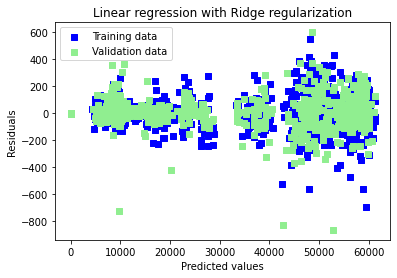

In [4181]:
print("Ridge RMSE on Training set :", rmse_cv_train(ridge).mean())
print("Ridge RMSE on Test set :", rmse_cv_test(ridge).mean())
y_train_rdg = ridge.predict(X_train)
y_test_rdg = ridge.predict(X_test)

# Plot residuals
plt.scatter(y_train_rdg, y_train_rdg - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_rdg, y_test_rdg - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

In [4182]:
preds = ridge.predict(test_df)

df = pd.read_csv('SampleSubmission.csv')
df['close'] = preds
df.to_csv('Regression.csv', index = False)

In [4183]:
sh = pd.read_csv('Regression.csv')
sh.head()

,id,close
0,ID_323Sn2,1.309928
1,ID_325SNW,11351.775057
2,ID_325uzE,6296.547055
3,ID_328qCx,-0.493868
4,ID_3293uJ,0.943515


Ridge picked 37 features and eliminated the other 0 features


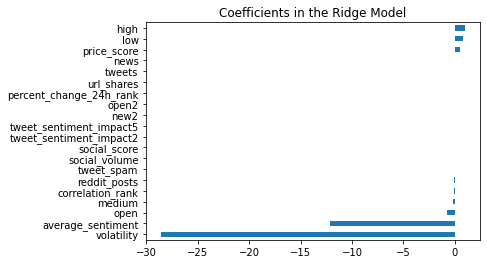

In [4127]:
# Plot important coefficients
coefs = pd.Series(ridge.coef_, index = X_train.columns)
print("Ridge picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Ridge Model")
plt.show()

Best l1_ratio : 0.7
Best alpha : 0.0001
Try again for more precision with l1_ratio centered around 0.7
Best l1_ratio : 0.7
Best alpha : 0.0001
Now try again for more precision on alpha, with l1_ratio fixed at 0.7 and alpha centered around 0.0001
Best l1_ratio : 0.7
Best alpha : 6e-05
ElasticNet RMSE on Training set : 107.18567068198132
ElasticNet RMSE on Test set : 124.49458067913768


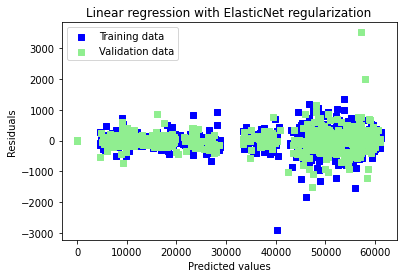

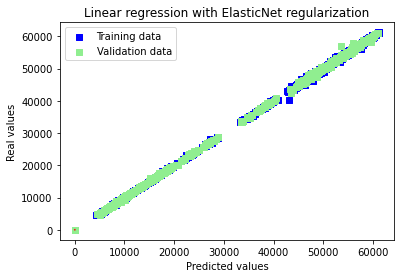

ElasticNet picked 37 features and eliminated the other 0 features


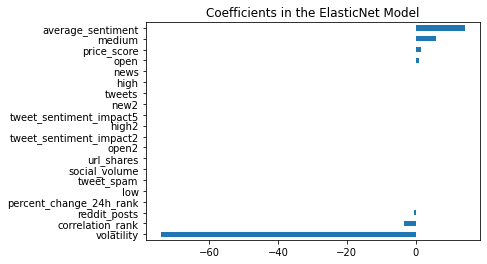

In [4128]:
elasticNet = ElasticNetCV(l1_ratio = [0.1, 0.3, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 1],
                          alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 
                                    0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6], 
                          max_iter = 50000, cv = 10)
elasticNet.fit(X_train, y_train)
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )


print("Try again for more precision with l1_ratio centered around " + str(ratio))
elasticNet = ElasticNetCV(l1_ratio = [ratio * .85, ratio * .9, ratio * .95, ratio, ratio * 1.05, ratio * 1.1, ratio * 1.15],
                          alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6],max_iter = 50000, cv = 10)


elasticNet.fit(X_train, y_train)
if (elasticNet.l1_ratio_ > 1):
    elasticNet.l1_ratio_ = 1    
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )


print("Now try again for more precision on alpha, with l1_ratio fixed at " + str(ratio) + 
      " and alpha centered around " + str(alpha))
elasticNet = ElasticNetCV(l1_ratio = ratio,
                          alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, alpha * .9, 
                                    alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, 
                                    alpha * 1.35, alpha * 1.4], 
                          max_iter = 50000, cv = 10)
elasticNet.fit(X_train, y_train)
if (elasticNet.l1_ratio_ > 1):
    elasticNet.l1_ratio_ = 1    
alpha = elasticNet.alpha_

ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

print("ElasticNet RMSE on Training set :", rmse_cv_train(elasticNet).mean())
print("ElasticNet RMSE on Test set :", rmse_cv_test(elasticNet).mean())
y_train_ela = elasticNet.predict(X_train)
y_test_ela = elasticNet.predict(X_test)


# Plot residuals
plt.scatter(y_train_ela, y_train_ela - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_ela, y_test_ela - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with ElasticNet regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()


plt.scatter(y_train, y_train_ela, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test, y_test_ela, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with ElasticNet regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

# Plot important coefficients
coefs = pd.Series(elasticNet.coef_, index = X_train.columns)
print("ElasticNet picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the ElasticNet Model")
plt.show()

Best alpha : 0.0001
Try again for more precision with alphas centered around 0.0001
Best alpha : 6e-05
Lasso RMSE on Training set : 107.11242776601875
Lasso RMSE on Test set : 124.45603945812846


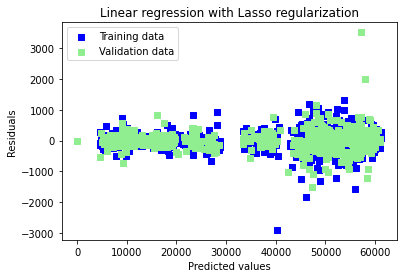

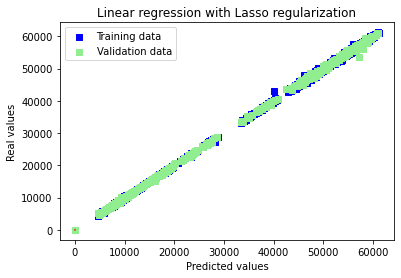

Lasso picked 37 features and eliminated the other 0 features


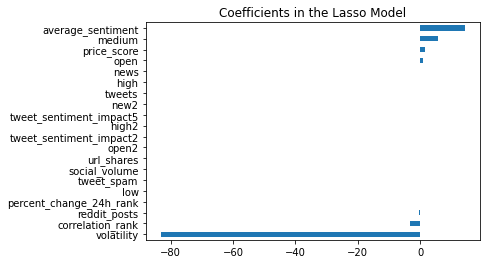

In [4136]:
lasso = LassoCV(alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 
                          0.3, 0.6, 1], 
                max_iter = 50000, cv = 10)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
lasso = LassoCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, 
                          alpha * .85, alpha * .9, alpha * .95, alpha, alpha * 1.05, 
                          alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, alpha * 1.35, 
                          alpha * 1.4], 
                max_iter = 50000, cv = 10)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)
print("Lasso RMSE on Training set :", rmse_cv_train(lasso).mean())
print("Lasso RMSE on Test set :", rmse_cv_test(lasso).mean())
y_train_las = lasso.predict(X_train)
y_test_las = lasso.predict(X_test)

# Plot residuals
plt.scatter(y_train_las, y_train_las - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_las, y_test_las - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Lasso regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()


plt.scatter(y_train_las, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_las, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Lasso regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

# Plot important coefficients
coefs = pd.Series(lasso.coef_, index = X_train.columns)
print("Lasso picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")
plt.show()

In [4147]:
preds = lm_model.predict(test_df)

In [4148]:
df = pd.read_csv('SampleSubmission.csv')
df['close'] = preds
df.to_csv('Regression.csv', index = False)

In [4149]:
reg = pd.read_csv('Regression.csv')
reg.head()

,id,close
0,ID_323Sn2,0.752376
1,ID_325SNW,11354.021079
2,ID_325uzE,6295.374968
3,ID_328qCx,0.391430
4,ID_3293uJ,-0.028504


In [1025]:
frame = pd.read_csv('Regression.csv')


In [1026]:
import math
math.isnan(ttest['open'][0])

True

In [1027]:
lt = []
for i in range(len(ttest)):
    if math.isnan(ttest['open'][i]) or math.isnan(ttest['high'][i]) or math.isnan(ttest['low'][i]) == True:
        lt.append(ttest['id'][i])

In [1028]:
#ttest.shape
ltt = []
for i in range(len(lt)):
    a = frame[frame['id']==lt[i]].index.values
    ltt.append(a.item())

In [1029]:

for i in range(len(ltt)):
    frame['close'][ltt[i]] = int(0)

C:\Users\Osuntoki\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [1030]:
frame

,id,close
0,ID_323Sn2,0.000000
1,ID_325SNW,11356.504338
2,ID_325uzE,6303.109926
3,ID_328qCx,0.000000
4,ID_3293uJ,0.000000
...,...,...
6217,ID_zufSPk,8257.861198
6218,ID_zuz9yf,10874.050258
6219,ID_zvrMSX,0.000000
6220,ID_zy9Cfv,0.000000


In [1031]:
frame.to_csv('Linear.csv', index = False)

In [5742]:
# Make predictions in test set and prepare submission file
main_cols = test_df.columns.difference(['close'])
predictions = lm2.predict(test_df)

ss = pd.read_csv('SampleSubmission.csv')
sub_file = ss.copy()
sub_file.close = predictions
sub_file.to_csv('Baseline.csv', index = False)